In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [3]:
# Cargar el dataset
data = pd.read_csv(r"C:\UNAD\Mall_Customers.csv")

In [5]:
# Exploración de los datos
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación general:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None



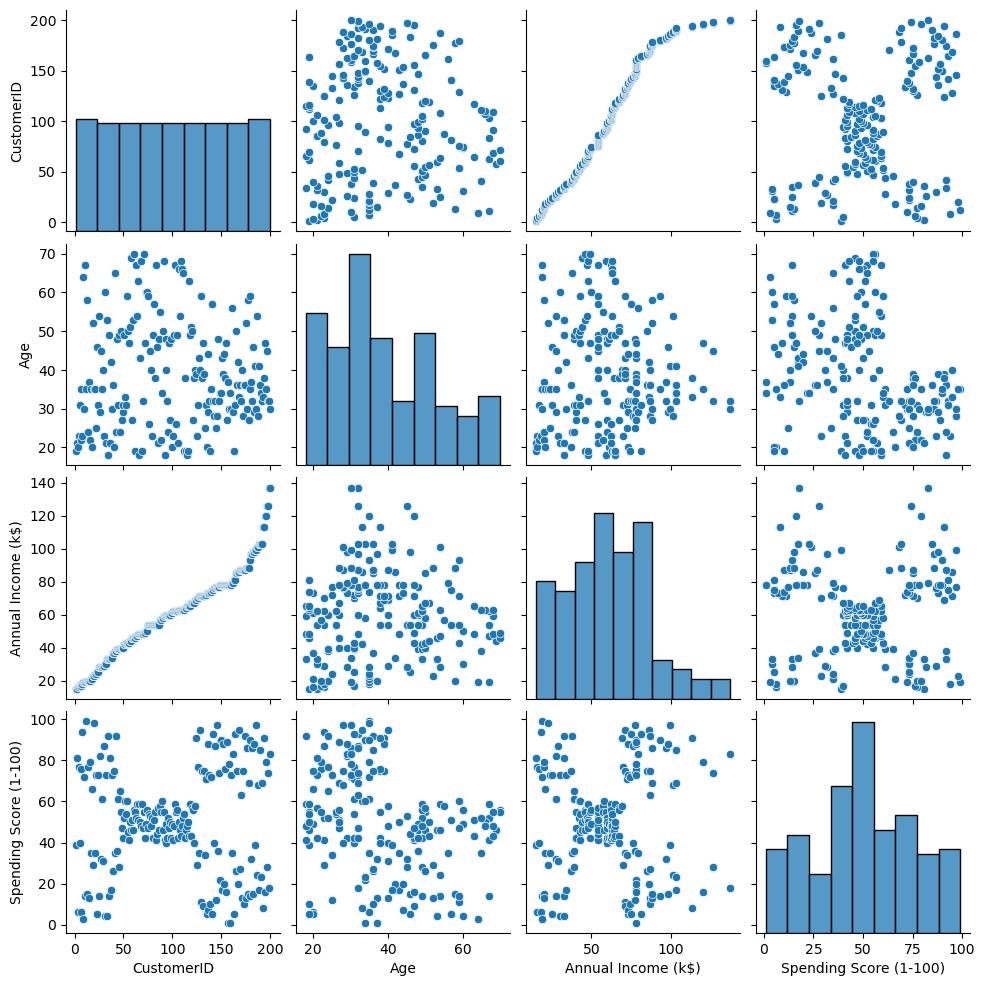

In [7]:
# Visualización inicial
sns.pairplot(data.select_dtypes(include=[np.number]))
plt.show()

In [9]:
# Preprocesamiento
# Convertir género a valores numéricos
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [11]:
# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('CustomerID', axis=1))  # Excluir CustomerID

In [13]:
# Selección de características
# Vamos a usar 'Annual Income (k$)' y 'Spending Score (1-100)' para clustering
selected_features = scaled_data[:, [2, 3]]

In [15]:
# Entrenamiento del modelo K-Means
inertia = []
silhouette_scores = []

In [17]:
# Determinación del número óptimo de clústeres
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(selected_features, kmeans.labels_))

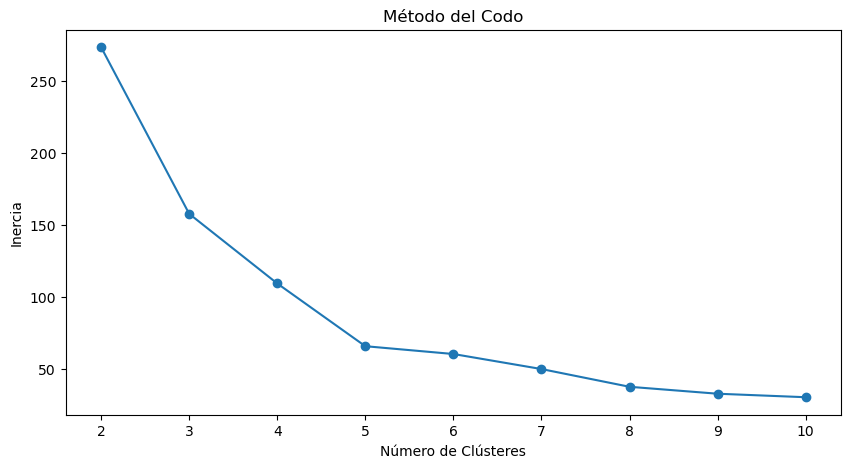

In [19]:
# Graficar codo (Elbow) para determinar el mejor número de clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clústeres")
plt.ylabel("Inercia")
plt.show()

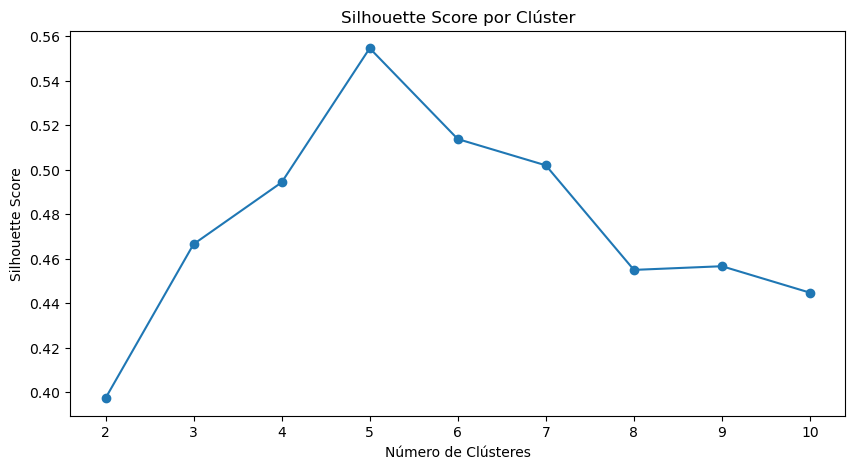

In [21]:
# Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score por Clúster")
plt.xlabel("Número de Clústeres")
plt.ylabel("Silhouette Score")
plt.show()

In [23]:
# Entrenar modelo con número óptimo de clústeres (k=5 como ejemplo)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_features)

In [27]:
# Evaluación del modelo
silhouette_avg = silhouette_score(selected_features, data['Cluster'])
calinski_harabasz = calinski_harabasz_score(selected_features, data['Cluster'])

print(f"Silhouette Score Promedio: {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

Silhouette Score Promedio: 0.55
Índice de Calinski-Harabasz: 248.65


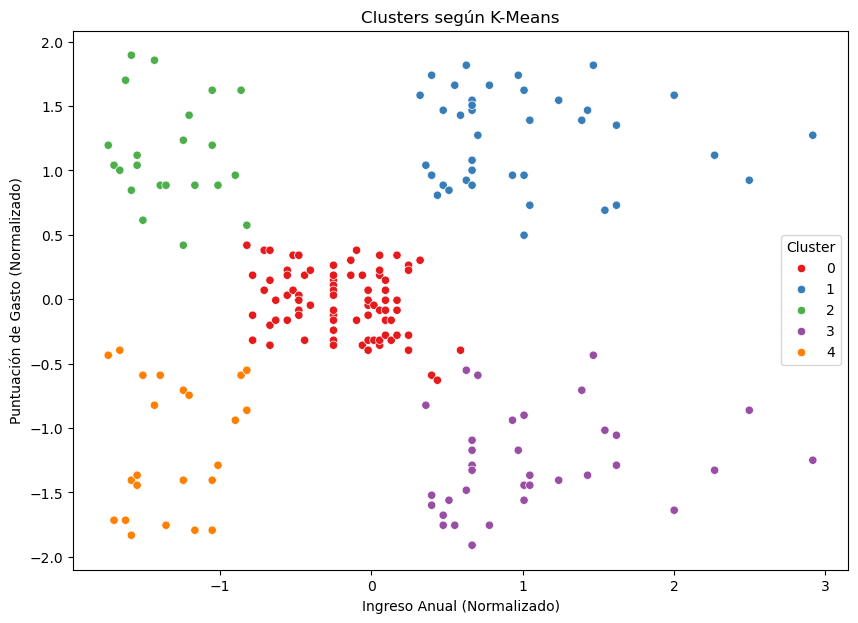

In [29]:
# Visualización de resultados
plt.figure(figsize=(10, 7))
sns.scatterplot(x=selected_features[:, 0], y=selected_features[:, 1], hue=data['Cluster'], palette="Set1")
plt.title("Clusters según K-Means")
plt.xlabel("Ingreso Anual (Normalizado)")
plt.ylabel("Puntuación de Gasto (Normalizado)")
plt.legend(title="Cluster")
plt.show()

In [31]:
# Conclusión
print("\nConclusiones:")
print("1. El modelo K-Means agrupó a los clientes en clusters basados en sus ingresos anuales y puntuación de gasto.")
print("2. Los resultados sugieren diferentes perfiles de clientes que podrían ser útiles para estrategias de marketing específicas.")


Conclusiones:
1. El modelo K-Means agrupó a los clientes en clusters basados en sus ingresos anuales y puntuación de gasto.
2. Los resultados sugieren diferentes perfiles de clientes que podrían ser útiles para estrategias de marketing específicas.
